# Problem class 3. Solving a singular boundary-value problem 

Boundary-value problems are much harder than initial-value problems. In this sheet, we will look to study:
\begin{gather}
\epsilon T'' + 2 T' + T = 0, \\
T(0) = 0 \quad \text{and} \quad T(1) = 1,
\end{gather}
where $0 < \epsilon \ll 1$. 

This sheet implements a shooting algorithm instead of using Python's `solve_bvp` script.

## Investigate the BVP as an IVP

One method of proceeding is to treat the BVP as an IVP, supplementing the $T(0) = 0$ condition with the condition that $T'(0) = a$ where $a$ is unknown. Solve this for different values of $a$ until you have some confidence where $a$ lies so that the boundary condition $T(1) = 1$ is satisfied. 

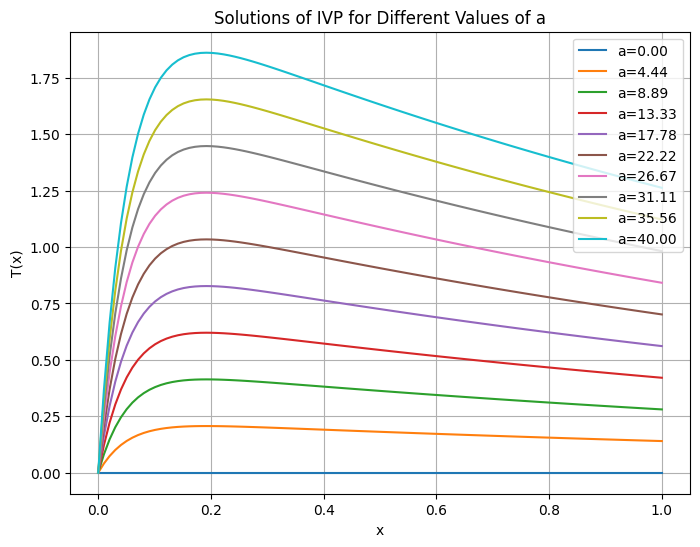

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode_system(x, y, eps):
    """
    Converts the second-order ODE into a system of first-order ODEs.
    y[0] = T, y[1] = T'
    """
    return [y[1], (-2 * y[1] - y[0]) / eps]

# Parameters
eps = 0.1  # Modify epsilon as needed
x_range = (0, 1)
x_values = np.linspace(x_range[0], x_range[1], 100)
T0 = 0  # Initial condition for T
a_values = np.linspace(0, 40, 10)  # Range of values for T'(0)

plt.figure(figsize=(8, 6))

# Loop through different values of a
for a in a_values:
    sol = solve_ivp(ode_system, x_range, [T0, a], args=(eps,), t_eval=x_values)
    plt.plot(sol.t, sol.y[0], label=f"a={a:.2f}")

plt.xlabel("x")
plt.ylabel("T(x)")
plt.title("Solutions of IVP for Different Values of a")
plt.legend()
plt.grid()
plt.show()


Once you have bracketted the correct value of `a`, you can then attempt to solve for the exact value of `a` using a bisection scheme (or any root finder). 

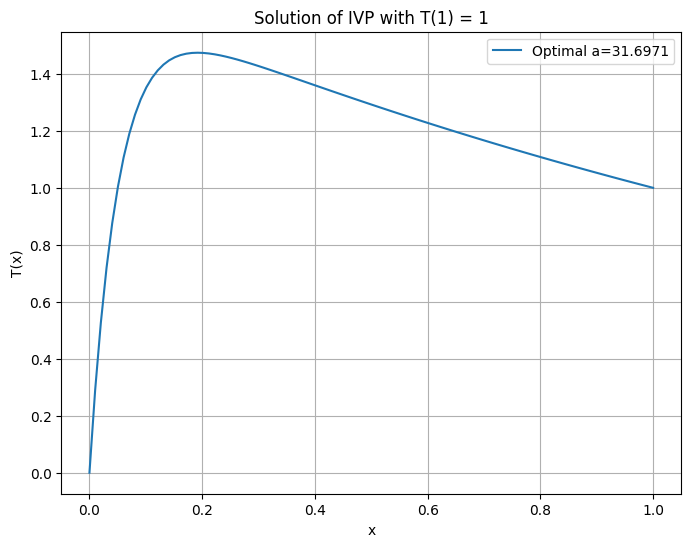

In [21]:
from scipy.optimize import root_scalar

def solve_for_T1(a, eps):
    """
    Solves the ODE for a given a and returns T(1)
    """
    sol = solve_ivp(ode_system, (0, 1), [0, a], args=(eps,), t_eval=[1])
    return sol.y[0, -1] - 1  # We want T(1) = 1, so return deviation

# Parameters
eps = 0.1  # Modify epsilon as needed

# Find the correct 'a' using a root-finding method
solution = root_scalar(solve_for_T1, args=(eps,), bracket=[20, 40], method='brentq')
a_optimal = solution.root

# Solve the ODE with the found 'a'
x_values = np.linspace(0, 1, 100)
sol = solve_ivp(ode_system, (0, 1), [0, a_optimal], args=(eps,), t_eval=x_values)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label=f"Optimal a={a_optimal:.4f}")
plt.xlabel("x")
plt.ylabel("T(x)")
plt.title("Solution of IVP with T(1) = 1")
plt.legend()
plt.grid()
plt.show()
